In [3]:
import math
import nltk
import scipy
import string
import re
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
df = pd.read_csv('tweets.csv')
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [6]:
df.tail()

,textID,text,selected_text,sentiment
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive
27480,6f7127d9d7,All this flirting going on - The ATG smiles...,All this flirting going on - The ATG smiles. Y...,neutral


In [7]:
df.shape

(27481, 4)

In [9]:
df.size

109924

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [12]:
df.describe()

,textID,text,selected_text,sentiment
count,27481,27480,27480,27481
unique,27481,27480,22430,3
top,cb774db0d1,"I`d have responded, if I were going",good,neutral
freq,1,1,199,11118


In [13]:
df.drop(['selected_text', 'textID'], axis=1, inplace=True)

In [14]:
df

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
...,...,...
27476,wish we could come see u on Denver husband l...,negative
27477,I`ve wondered about rake to. The client has ...,negative
27478,Yay good for both of you. Enjoy the break - y...,positive
27479,But it was worth it ****.,positive


In [15]:
target = 'sentiment'

In [16]:
original_df = df.copy(deep=True)

# Data Preprocessing

In [17]:
df.isnull().sum()

text         1
sentiment    0
dtype: int64

In [20]:
##Dropping the null values
df.dropna(inplace=True)
original_df = df.copy()

In [21]:
df[df.duplicated()]

,text,sentiment


In [26]:
#Removal of any Duplicate rows (if any)

counter = 0
r,c = original_df.shape

df_dedup = df.drop_duplicates()
df_dedup.reset_index(drop=True, inplace=True)

if df_dedup.shape==(r,c):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {r-df_dedup.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [27]:
df_dedup.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [30]:
#Filtering the text

df_fltr = df_dedup.copy()

def preprocessor(text):
    #text = re.sub('[http:,https:]','',text)
    text = re.sub('[^a-zA-Z]',' ',text)
    text = text.lower()
    text = text.strip()
    text = ''.join([i for i in text if i in string.ascii_lowercase+' '])
    text = ' '.join([word for word in text.split() if word.isalnum()])
    text = ' '.join([WordNetLemmatizer().lemmatize(word,pos='v') for word in text.split()])    
    #text = ' '.join([PorterStemmer().stem(word) for word in text.split()])
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    #text = ' '.join([word for word in text.split() if len(word)>3])
    return text

In [33]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df_fltr['text'] = df_dedup['text'].apply(preprocessor)


df_fltr.head()

In [36]:
from nltk.stem.porter import PorterStemmer

In [37]:
porter=PorterStemmer()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,tokenizer=tokenizer_porter,use_idf=True,norm='l2',smooth_idf=True)
label=df_fltr[target].values
features=tfidf.fit_transform(df_fltr.text)

In [42]:
label

array(['neutral', 'negative', 'negative', ..., 'positive', 'positive',
       'neutral'], dtype=object)

In [43]:
features

<27480x41295 sparse matrix of type '<class 'numpy.float64'>'
	with 336350 stored elements in Compressed Sparse Row format>

# Exploratory Data Analysis (EDA)

In [45]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20,6]

            Target Variable Distribution           


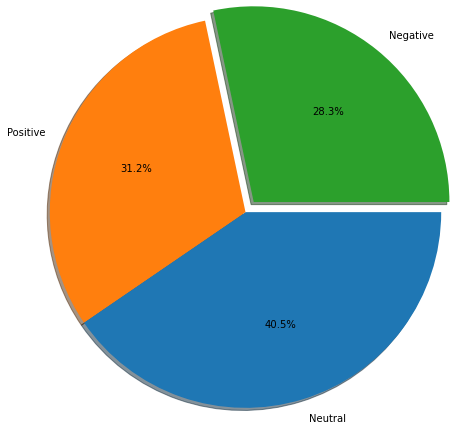

In [46]:
print('\033[1mTarget Variable Distribution'.center(55))
plt.pie(df_fltr[target].value_counts(), labels=['Neutral','Positive','Negative'], counterclock=False, shadow=True, 
        explode=[0,0,0.1], autopct='%1.1f%%', radius=1.5, startangle=0)
plt.show()

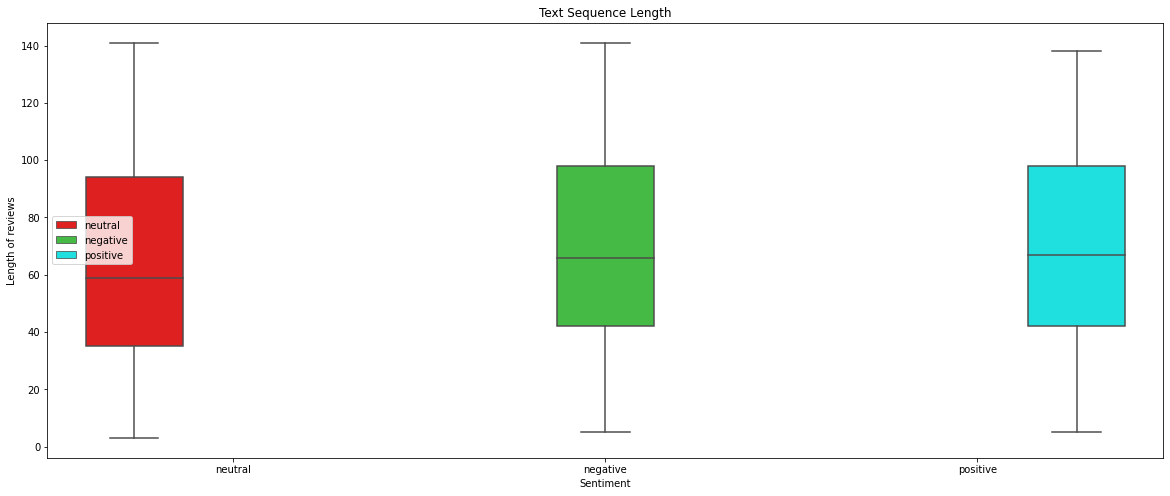

In [52]:
# Visualising the average text sequence length

df_rl = df_fltr.copy()
df_rl['review_length'] = 0


df_rl['review_length'] = df_rl['text'].apply(lambda x: len(x))

plt.figure(figsize=[20,8])
sns.boxplot(x=label,y='review_length', data=df_rl, hue=label,palette=['red','limegreen','cyan'])
plt.title('Text Sequence Length')
plt.xlabel("Sentiment")
plt.ylabel("Length of reviews")
plt.show()

In [53]:
neut_df = original_df[original_df[target]=='neutral']['text']
pos_df = original_df[original_df[target]=='positive']['text']

neg_df = original_df[original_df[target]== 'negative']['text']

In [54]:
def freq_text(text_df):

    combi_text=""
    for x in text_df.values:
        combi_text+=' '.join(x.split())
    combi_text  = [x for x in combi_text.split() if len(x) >3 and x not in stopwords.words('english')]  
    return combi_text

In [55]:
def freq_df(text_count_df,senti):
    fredis = nltk.FreqDist(neut_text)
    fredis_df = pd.DataFrame({senti: list(fredis.keys()),
                      'Count': list(fredis.values())})
    fredis_df = fredis_df.sort_values(by='Count',ascending=False)
    return fredis_df

In [56]:
def plot_freq_dis(text_count_df,senti):
    sns.barplot(data=text_count_df[:10],x=senti,y='Count')

In [57]:
neut_df.shape


(11117,)

In [ ]:
senti ='Neutral'
neut_text = freq_text(neut_df)
neut_frq_df = freq_df(neut_text,senti)
plot_freq_dis(neut_frq_df,senti)


In [59]:
def wordcloud_draw(data, color, s):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split() if(word!='movie' and word!='film')])
    wordcloud = WordCloud(stopwords=stopwords.words('english'),background_color=color,width=2500,height=2000).generate(cleaned_word)
    plt.imshow(wordcloud)
    plt.title(s)
    plt.axis('off')

# Predictive Modeling

In [64]:

label_mapping={'negative':0, 'neutral':1, 'positive':2}
df_fltr['sentiment'] = df_fltr['sentiment'].map(label_mapping)

In [65]:
X = features
y = pd.Series(label).map(label_mapping)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

print('Original set  ---> ','feature size: ',X.shape,'label size',len(y))
print('Training set  ---> ','feature size: ',X_train.shape,'label size',len(y_train))
print('Testing set   ---> ','feature size: ',X_test.shape,'label size',len(y_test))

Original set  --->  feature size:  (27480, 41295) label size 27480
Training set  --->  feature size:  (21984, 41295) label size 21984
Testing set   --->  feature size:  (5496, 41295) label size 5496


In [67]:
result_df = pd.DataFrame(columns=['Models','Accuracy', 'Precision','Recall','F1-score','AUC-ROC score'])
result_df['Models']=['Logistic Regression (LR)','Decision Tree Classifier (DT)','Random Forest Classifier (RF)','Naïve Bayes Classifier (NB)']
result_df.fillna(0.0,inplace=True)
result_df.set_index('Models',inplace=True)
result_df


,Accuracy,Precision,Recall,F1-score,AUC-ROC score
Models,,,,,
Logistic Regression (LR),0.0,0.0,0.0,0.0,0.0
Decision Tree Classifier (DT),0.0,0.0,0.0,0.0,0.0
Random Forest Classifier (RF),0.0,0.0,0.0,0.0,0.0
Naïve Bayes Classifier (NB),0.0,0.0,0.0,0.0,0.0


In [68]:
result_df.loc['Logistic Regression (LR)','Accuracy']

0.0

In [69]:
#Classification Summary Function
def classification_summary(pred,pred_prob,model):
    result_df.loc[model,'Accuracy']   =round(accuracy_score(y_test,pred),3)*100   
    result_df.loc[model,'Precision']=round(precision_score(y_test, pred, average='weighted'),3)*100 #, average='weighted'
    result_df.loc[model,'Recall']=round(recall_score(y_test, pred, average='weighted'),3)*100 #, average='weighted'
    result_df.loc[model,'F1-score']=round(f1_score(y_test, pred, average='weighted'),3)*100 #, average='weighted'
    result_df.loc[model,'AUC-ROC score']=round(roc_auc_score(y_test, pred_prob, multi_class='ovr'),3)*100 #, multi_class='ovr'
    
    print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3,'-'*35,model, '-'*35,'>'*3))
    print('Accuracy = {}%'.format(round(accuracy_score(y_test, pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(y_test, pred, average='weighted'),3)*100)) #, average='weighted'
    print('Precision Score = {}%'.format(round(precision_score(y_test, pred, average='weighted'),3)*100))
    print('Recall Score = {}%'.format(round(recall_score(y_test, pred, average='weighted'),3)*100))
    print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(y_test, pred))
    print('\n\033[1mClassification Report:\033[0m\n',classification_report(y_test, pred))
    
    auc_roc(y_test, pred_prob, curves=['each_class'])
    plt.show()

In [81]:
#Visualising Function
def auc_roc_plot(y_test, pred):    
    ref = [0 for _ in range(len(y_test))]
    ref_auc = roc_auc_score(y_test, ref)
    lr_auc = roc_auc_score(y_test, pred)

    ns_fpr, ns_tpr, _ = roc_curve(y_test, ref)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, pred)

    plt.plot(ns_fpr, ns_tpr, linestyle='=')
    plt.plot(lr_fpr, lr_tpr, marker='*', label='AUC = {}'.format(round(roc_auc_score(y_test, pred)*100,2))) 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

# Logistic Regression:

In [89]:
!pip install scikit-plot

In [90]:
from scikitplot.metrics import plot_roc_curve as auc_roc

In [91]:
import scipy
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score,roc_auc_score, roc_curve, precision_score, recall_score

C:\Users\USER\anaconda3\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\New folder\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<<<----------------------------------- Evaluating Logistic Regression (LR) ----------------------------------->>>

Accuracy = 66.8%
F1 Score = 66.7%
Precision Score = 68.10000000000001%
Recall Score = 66.8%

 Confusiton Matrix:
 [[ 829  612   82]
 [ 274 1741  260]
 [  83  511 1104]]

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.54      0.61      1523
           1       0.61      0.77      0.68      2275
           2       0.76      0.65      0.70      1698

    accuracy                           0.67      5496
   macro avg       0.69      0.65      0.66      5496
weighted avg       0.68      0.67      0.67      5496



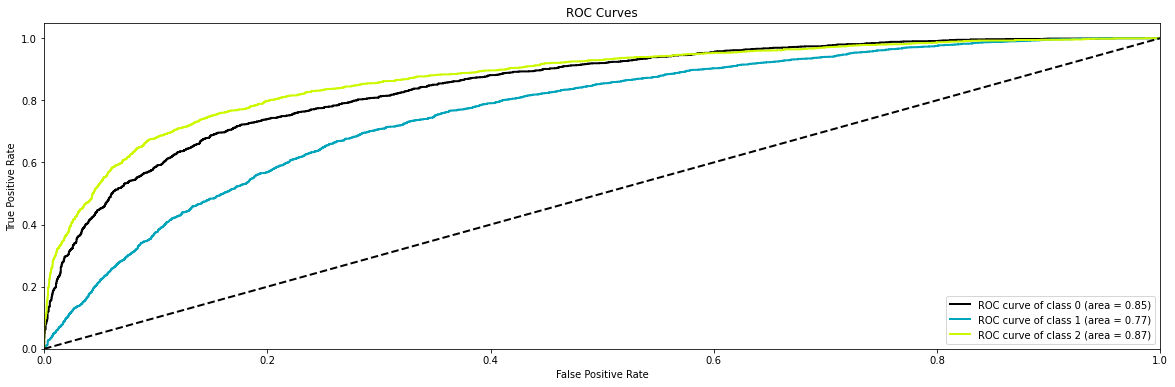

In [92]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)
pred = log_reg_model.predict(X_test)
pred_prob = log_reg_model.predict_proba(X_test)
classification_summary(pred,pred_prob,'Logistic Regression (LR)')

# Decision Tree Classifier

In [93]:
from sklearn.tree import DecisionTreeClassifier

<<<----------------------------------- Evaluating Decision Tree Classifier (DT) ----------------------------------->>>

Accuracy = 57.9%
F1 Score = 57.99999999999999%
Precision Score = 58.099999999999994%
Recall Score = 57.9%

 Confusiton Matrix:
 [[ 803  540  180]
 [ 512 1367  396]
 [ 196  488 1014]]

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.53      0.53      1523
           1       0.57      0.60      0.59      2275
           2       0.64      0.60      0.62      1698

    accuracy                           0.58      5496
   macro avg       0.58      0.58      0.58      5496
weighted avg       0.58      0.58      0.58      5496



C:\Users\USER\anaconda3\New folder\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


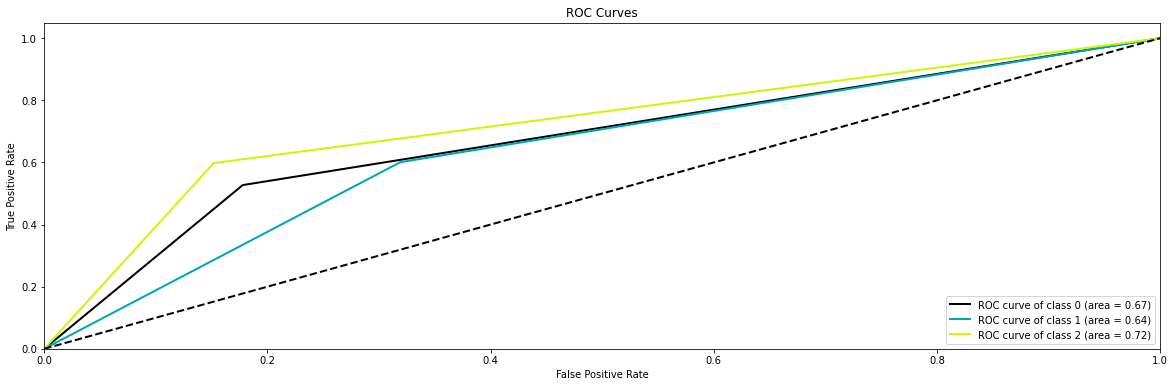

In [94]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)
pred = DT_model.predict(X_test)
pred_prob = DT_model.predict_proba(X_test)
classification_summary(pred,pred_prob,'Decision Tree Classifier (DT)')

# Random Forest Classifier:

In [120]:
!pip install -U scikit-learn==0.21.3

  Using cached scikit-learn-0.21.3.tar.gz (12.2 MB)
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
    Running setup.py install for scikit-learn: started
    Running setup.py install for scikit-learn: finished with status 'error'
  Rolling back uninstall of scikit-learn
  Moving to c:\users\user\anaconda3\new folder\lib\site-packages\scikit_learn-0.24.2.dist-info\
   from C:\Users\USER\anaconda3\New folder\Lib\site-packages\~cikit_learn-0.24.2.dist-info
  Moving to c:\users\user\anaconda3\new folder\lib\site-packages\sklearn\
   from C:\Users\USER\anaconda3\New folder\Lib\site-packages\~klearn


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\USER\anaconda3\New folder\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\USER\\AppData\\Local\\Temp\\pip-install-a233siaf\\scikit-learn_70585850328f4a4d84033833d7a68e97\\setup.py'"'"'; __file__='"'"'C:\\Users\\USER\\AppData\\Local\\Temp\\pip-install-a233siaf\\scikit-learn_70585850328f4a4d84033833d7a68e97\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\USER\AppData\Local\Temp\pip-wheel-8n_bn1d4'
       cwd: C:\Users\USER\AppData\Local\Temp\pip-install-a233siaf\scikit-learn_70585850328f4a4d84033833d7a68e97\
  Complete output (33 lines):
  Partial import of sklearn during the build process.
  No module named 'numpy.distutils._msv

In [121]:
from sklearn.ensemble import RandomForestClassifier

<<<----------------------------------- Evaluating Random Forest Classifier (RF) ----------------------------------->>>

Accuracy = 64.5%
F1 Score = 63.9%
Precision Score = 67.10000000000001%
Recall Score = 64.5%

 Confusiton Matrix:
 [[ 697  743   83]
 [ 204 1831  240]
 [  73  610 1015]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.46      0.56      1523
           1       0.58      0.80      0.67      2275
           2       0.76      0.60      0.67      1698

    accuracy                           0.64      5496
   macro avg       0.68      0.62      0.63      5496
weighted avg       0.67      0.64      0.64      5496



C:\Users\USER\anaconda3\New folder\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


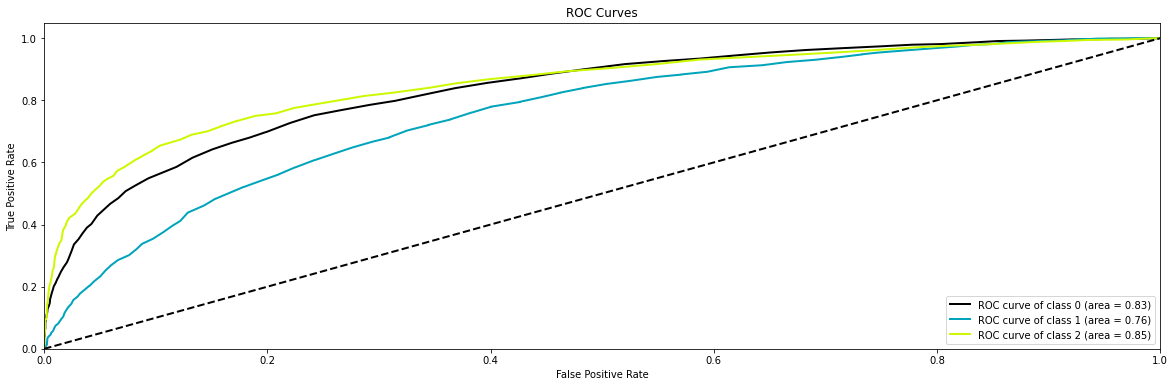

In [119]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)
pred = RF_model.predict(X_test)
pred_prob = RF_model.predict_proba(X_test)
classification_summary(pred,pred_prob,'Random Forest Classifier (RF)')

# Naive Bayes Classfier:

In [101]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier

<<<----------------------------------- Evaluating Naïve Bayes Classifier (NB) ----------------------------------->>>

Accuracy = 59.699999999999996%
F1 Score = 58.199999999999996%
Precision Score = 63.5%
Recall Score = 59.699999999999996%

 Confusiton Matrix:
 [[ 513  932   78]
 [ 190 1859  226]
 [  64  727  907]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.34      0.45      1523
           1       0.53      0.82      0.64      2275
           2       0.75      0.53      0.62      1698

    accuracy                           0.60      5496
   macro avg       0.65      0.56      0.57      5496
weighted avg       0.64      0.60      0.58      5496



C:\Users\USER\anaconda3\New folder\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


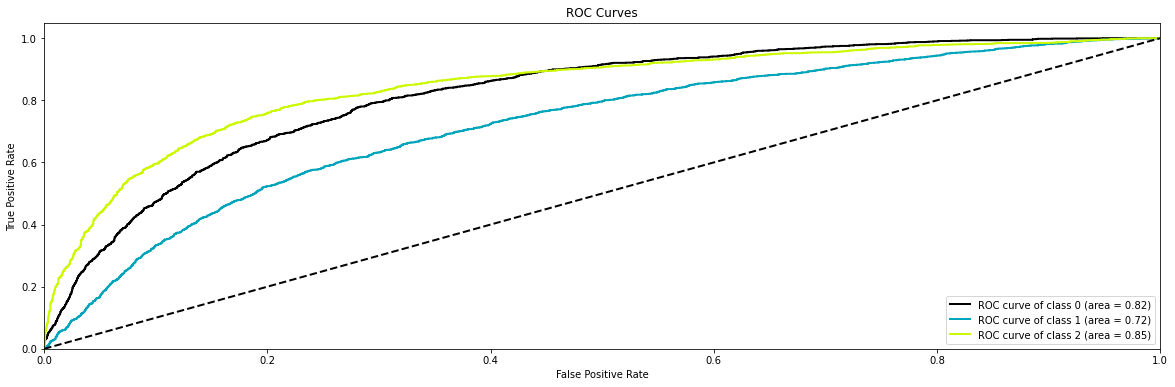

In [102]:
NB_model = BernoulliNB()
NB_model.fit(X_train,y_train)
pred = NB_model.predict(X_test)
pred_prob = NB_model.predict_proba(X_test)
classification_summary(pred,pred_prob,'Naïve Bayes Classifier (NB)')

In [103]:
#Plotting Confusion-Matrix of all the predictive Models

labels=['Positive','Negative']
def plot_cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.columns=labels
    cm.index=labels
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    #fig, ax = plt.subplots()
    sns.heatmap(cm, annot=annot, fmt='')# cmap= "GnBu"

In [104]:
def conf_mat_plot(all_models):
    plt.figure(figsize=[20,3*math.ceil(1+len([all_models])/4)])
    
    for i in range(len(all_models)):
        if len(labels)<=4:
            plt.subplot(1,4,i+1)
        else:
            plt.subplot(math.ceil(len(all_models)/2),2,i+1)
        pred = all_models[i].predict(X_test)
        #plot_cm(Test_Y, pred)
        sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.0f') #vmin=0,vmax=5,cmap='BuGn'
        plt.title(result_df.index[i])
        plt.yticks([0,1,2],labels=['Predicted Negative','Predicted Netural','Predicted Positive'],rotation=45)
        plt.xticks([0,1,2],labels=['Actual Negative','Actual Netural','Actual Positive'],rotation=45)
    plt.tight_layout()
    plt.show()

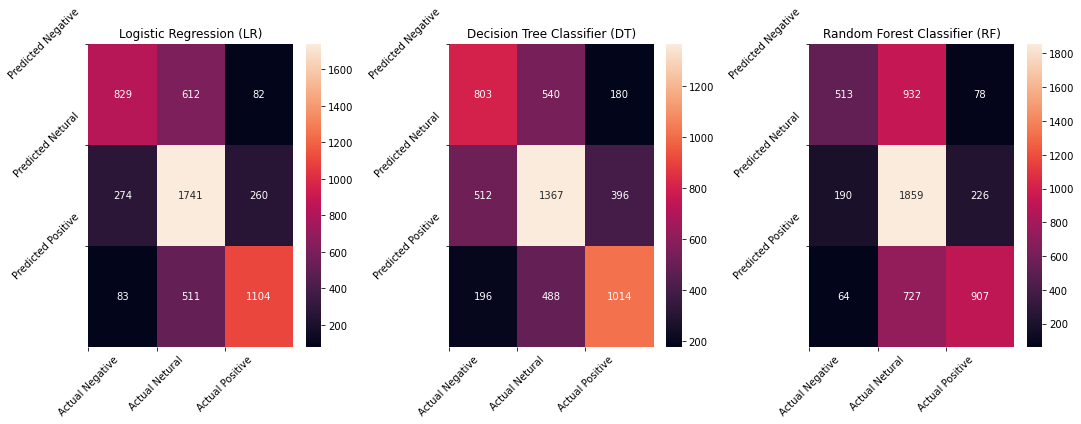

In [106]:
conf_mat_plot([log_reg_model,DT_model,NB_model])

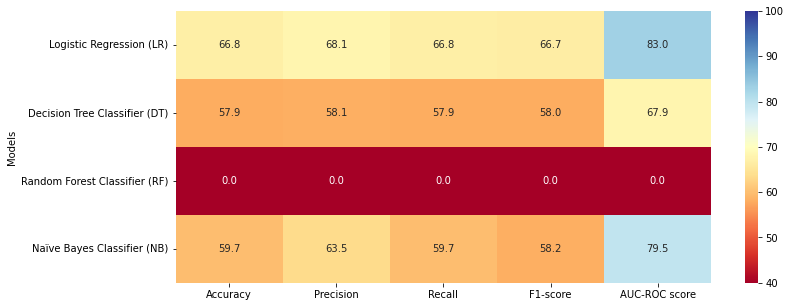

In [107]:
#Comparing all the models Scores

plt.figure(figsize=[12,5])
sns.heatmap(result_df, annot=True, vmin=40, vmax=100.0, cmap='RdYlBu', fmt='.1f')
plt.show()

In [108]:
param_grid = { 
    'n_estimators': [100,200,300,500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [1,2,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
from sklearn.model_selection import GridSearchCV